In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

from cellpose import models, core
use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)


# from PIL import fromarray
from skimage.filters import threshold_local
from scipy.ndimage.morphology import binary_opening
from skimage import io, filters, measure, color, img_as_ubyte
import skimage.morphology as sm
from skimage.segmentation import watershed
from skimage import measure, restoration,morphology
from skimage.exposure import rescale_intensity
import os
import pandas as pd
from scipy.ndimage.morphology import binary_fill_holes
import re
import glob
import random
import plotnine
from sklearn import preprocessing
from tqdm import tqdm

RANDOM_SEED = 8927
np.random.seed(286)

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


>>> GPU activated? 1


In [6]:
os.chdir(r'F:\HAB_2\PrinzScreen\training_classfication')
from utils import AIPS_cellpose as AC
from utils import AIPS_file_display as AFD

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.


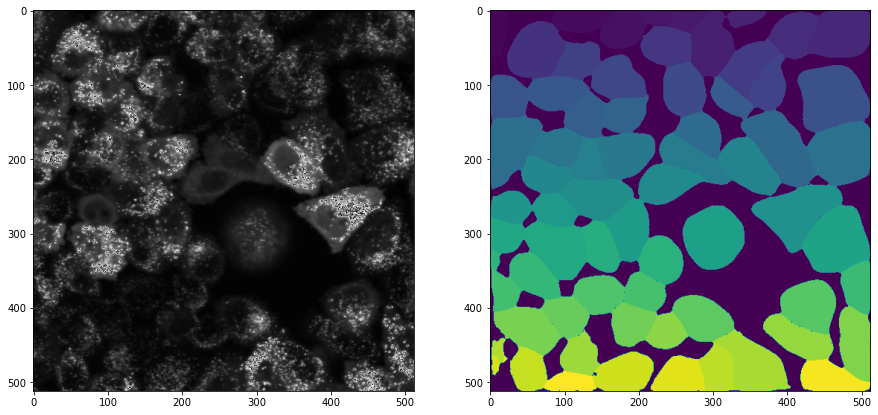

In [14]:
path_norm = r'F:\HAB_2\PrinzScreen\training_classfication\raw\mix\selected_images'
os.chdir(path_norm)
images_name = glob.glob("*.tif")

AIPS_pose_object = AC.AIPS_cellpose(Image_name = images_name[1], path= path_norm, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
# create mask for the entire image
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,:,:])
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img[0,:,:]*5,cmap=plt.cm.gray)
ax[1].imshow(mask)

In [ ]:
def measure_properties(input_image):
    def sd_intensity(regionmask, intensity_image):
        return np.std(intensity_image[regionmask])

    def skew_intensity(regionmask, intensity_image):
        return skew(intensity_image[regionmask])

    def pixelcount(regionmask):
        return np.sum(regionmask)

    def mean_int(regionmask, intensity_image):
        return np.mean(intensity_image[regionmask])
    
    def granularity_single(img_in,radius):
    '''
    Erosion and dilution process for calculating lost of single wen more opening is happening
    '''
        selem = morphology.disk(radius, dtype=bool)
        eros_pix = morphology.erosion(img_in, selem=selem)
        rec = morphology.dilation(eros_pix, selem=selem)
        return rec
    
    def open_operation(regionmask, intensity_image):
        img_in = np.mean(intensity_image[regionmask])
        signal_percentage = []
        rec_ = []
        for i in tqdm(range(0,opening_sequance)):
            rec = granularity_single(img,radius = i)
            signal_percentage.append((img_in - (img_in - np.mean(rec)))/img_in)
            rec_.append(np.mean(rec))
        rec_conden = '&'.join(rec_.tolist()
        return rec_conden
        

    prop_names = [
        "label",
        "area",
        "eccentricity",
        "euler_number",
        "extent",
        "feret_diameter_max",
        "inertia_tensor",
        "inertia_tensor_eigvals",
        "moments",
        "moments_central",
        "moments_hu",
        "moments_normalized",
        "orientation",
        "perimeter",
        "perimeter_crofton",
        # "slice",
        "solidity"
    ]
    table_prop = measure.regionprops_table(
        self.mask, intensity_image=input_image, properties=prop_names,
        extra_properties=(sd_intensity, skew_intensity, pixelcount, mean_int)
    )
    return table_prop

In [ ]:
def granularity_single(img_in,radius):
    '''
    Erosion and dilution process for calculating lost of single wen more opening is happening
    '''
    selem = morphology.disk(radius, dtype=bool)
    eros_pix = morphology.erosion(img_in, selem=selem)
    rec = morphology.dilation(eros_pix, selem=selem)
    return rec

def granularity_table(image_name,img,opening_sequance):
    '''
    Calucalte signale delta
    '''
    # Image intensity no operation
    img_in = np.mean(img)
    signale_precentage = []
    rec_ = []
    for i in tqdm(range(0,opening_sequance)):
        rec = granularity_single(img,radius = i)
        signale_precentage.append((img_in - (img_in - np.mean(rec)))/img_in)
        rec_.append(np.mean(rec))
        
    table = pd.DataFrame({'image_name':image_name,'radius_list':np.arange(opening_sequance),
                            'signel_precentage':signale_precentage,'open_image_signal':rec_,'start_image_signal':img_in})
    return table

In [ ]:
def granularity_table(image_name,img,opening_sequance):
    '''
    Calucalte signale delta
    '''
    def granularity_single(img_in,radius):
    '''
    Erosion and dilution process for calculating lost of single wen more opening is happening
    '''
        selem = morphology.disk(radius, dtype=bool)
        eros_pix = morphology.erosion(img_in, selem=selem)
        rec = morphology.dilation(eros_pix, selem=selem)
        return rec

    # Image intensity no operation
    img_in = np.mean(img)
    signale_precentage = []
    rec_ = []
    for i in tqdm(range(0,opening_sequance)):
        rec = granularity_single(img,radius = i)
        signale_precentage.append((img_in - (img_in - np.mean(rec)))/img_in)
        rec_.append(np.mean(rec))
        
    table = pd.DataFrame({'image_name':image_name,'radius_list':np.arange(opening_sequance),
                            'signel_precentage':signale_precentage,'open_image_signal':rec_,'start_image_signal':img_in})
    return table


measure.regionprops_table(
        self.mask, intensity_image=input_image, properties=prop_names,
        extra_properties=(sd_intensity, skew_intensity, pixelcount, mean_int)
    )

In [19]:
x = np.linspace(0,80,80).tolist()
rec_conden = ';'.join(str(x))


In [22]:
np.linspace(1,80,10,endpoint=False,dtype = int)

array([ 1,  8, 16, 24, 32, 40, 48, 56, 64, 72])

In [23]:
(1-0.99)/0.99

0.01010101010101011

98.99999999999991